In [10]:
import pandas as pd
import numpy as np

#dataset of NIST A-z
data=pd.read_csv("Downloads/Doctor_Handwritting/A_Z Handwritten Data.csv/A_Z Handwritten Data.csv",header=None)
data=np.array(data)

In [11]:
#dataset of MNIST
data_D = pd.read_csv("Downloads/Doctor_Handwritting/archive/mnist_train.csv",header=None)
data_D=np.array(data_D)
data_D=data_D[1:,:]

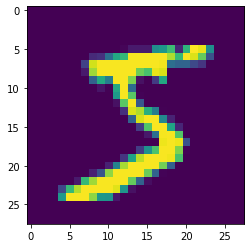

In [62]:

import matplotlib.pyplot as plt
plt.imshow(d)
plt.show()

In [73]:
x_az=data[:,1:]
y_az=data[:,:1]
x_d=data_D[:,1:].astype('int64')
y_d=data_D[:,:1].astype('int64')
y_az=y_az+10
x_az=x_az.reshape(len(x_az),28,28)
x_d=x_d.reshape(len(x_d),28,28)

In [74]:
x=np.concatenate((x_d,x_az),axis=0)
y=np.concatenate((y_d,y_az),axis=0)


In [85]:
#print(len(x))
indices = np.arange(len(x))
np.random.shuffle(indices)
train_size=int(0.8*len(x))
x_train,y_train=x[indices[:train_size]],y[indices[:train_size]]
x_val,y_val=x[indices[train_size:]],y[indices[train_size:]]

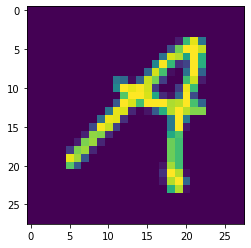

[10]


In [86]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])
plt.show()
print(y_train[2])

In [88]:
import pickle
dic={'x_train':x_train,'y_train':y_train,'x_val':x_val,'y_val':y_val}
filename=open("Desktop/ocr_data.pickle",'wb')
pickle.dump(dic,filename)
filename.close()


In [90]:
classes=['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J',
         'K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [96]:
#x.shape
x_train=x_train.reshape(-1,28,28,1)
x_val=x_val.reshape(-1,28,28,1)
#x_train[0].shape

In [98]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout,MaxPooling2D,Conv2D

model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1)))  #convolution layer with relu activation
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))                             #convolution layer with relu activation
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())                                    #Flatten layer with relu activation
model.add(Dense(128,Activation("relu"))) 

#model.add(Dense(64,Activation("relu")))                #Dense layer with activation relu

model.add(tf.keras.layers.Dense(36,activation=tf.nn.softmax))
model.summary()
#model.add(Activation("sigmoid"))                 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)             

In [100]:
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=["accuracy"])

In [102]:
model.fit(x_train,y_train,batch_size=32,epochs=3,validation_split=0.1)  #I just used three epochs you can use more


Epoch 1/3
9731/9731 [==============================] - 435s 45ms/step - loss: 0.1216 - accuracy: 0.9650 - val_loss: 0.1107 - val_accuracy: 0.9690
Epoch 2/3
9731/9731 [==============================] - 446s 46ms/step - loss: 0.0953 - accuracy: 0.9724 - val_loss: 0.1005 - val_accuracy: 0.9712
Epoch 3/3
9731/9731 [==============================] - 489s 50ms/step - loss: 0.0807 - accuracy: 0.9761 - val_loss: 0.1058 - val_accuracy: 0.9707


In [103]:
prediction=model.predict([x_val])

prediction: 2


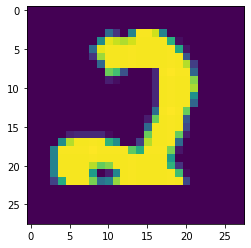

[2]


In [181]:
print("prediction:",classes[np.argmax(prediction[0])])

import matplotlib.pyplot as plt
plt.imshow(x_val[0])
plt.show()
print(y_val[0])

prediction: 8


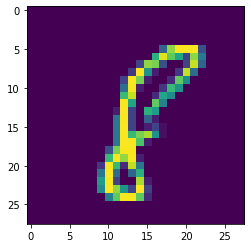

[8]


In [182]:
print("prediction:",classes[np.argmax(prediction[5])])

import matplotlib.pyplot as plt
plt.imshow(x_val[5])
plt.show()
print(y_val[5])

In [ ]:
model.save("Desktop/Handwriting_ocr")